In [24]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [26]:


url = "https://visual-crossing-weather.p.rapidapi.com/history"

querystring = {"startDateTime":"2019-01-01T00:00:00","aggregateHours":"24","location":"CA,USA","endDateTime":"2023-01-03T00:00:00","unitGroup":"us","dayStartTime":"8:00:00","contentType":"csv","dayEndTime":"17:00:00","shortColumnNames":"0"}

headers = {
	"X-RapidAPI-Key": "5648b01875msh91b03bca00e2a7fp1e3e01jsnd3e9d2f49240",
	"X-RapidAPI-Host": "visual-crossing-weather.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [19]:
# Save config information.
url = "https://history.openweathermap.org/data/2.5/history/city?"
units = "metric"

query_url = f"{url}id={id}&type=hour&start=1369789200&end=1686748800&appid={api_key}"


In [13]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
lon = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [15.6, 14.85, 15.11, 32.94, 27.99, 26.37, 25.5, 21.05, 30.59, 34.13]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,15.57
1,London,51.5085,15.04
2,Oslo,59.9127,15.11
3,Beijing,39.9075,32.94
4,Mumbai,19.0144,27.99
5,Manila,14.6042,25.89
6,New York,40.7143,25.46
7,Seattle,47.6062,21.22
8,Dallas,32.7668,30.89
9,Taipei,25.0478,33.93


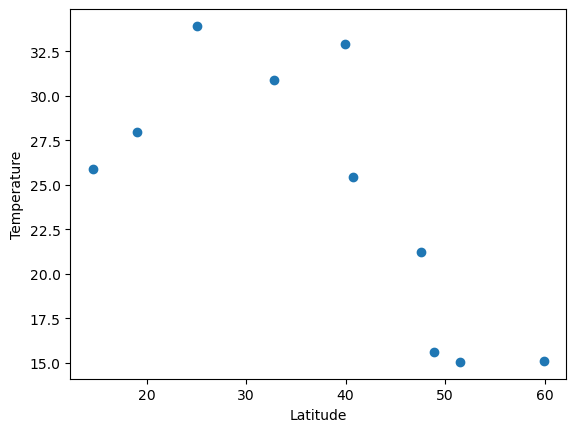

In [5]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [6]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    20.590496
1    19.658138
2    16.706943
3    23.731913
4    31.068676
5    32.617350
6    23.448600
7    21.028459
8    26.239422
9    28.950004
Name: lat, dtype: float64


In [7]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.35x +37.75


In [8]:
print(x_values)
print(regress_values)

0    48.8534
1    51.5085
2    59.9127
3    39.9075
4    19.0144
5    14.6042
6    40.7143
7    47.6062
8    32.7668
9    25.0478
Name: lat, dtype: float64
0    20.590496
1    19.658138
2    16.706943
3    23.731913
4    31.068676
5    32.617350
6    23.448600
7    21.028459
8    26.239422
9    28.950004
Name: lat, dtype: float64


The r-value is: 0.48368814837838214


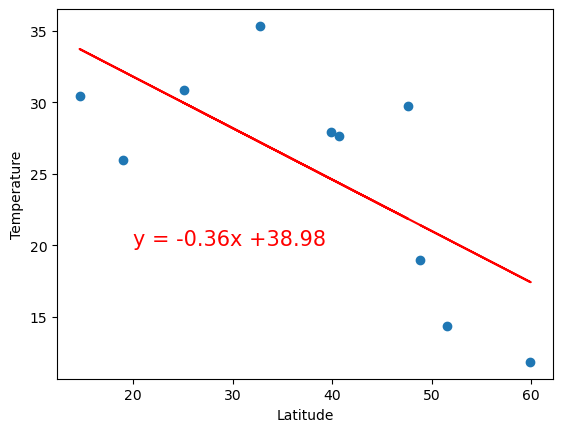

In [19]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [20]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 23.23.


In [21]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 21.18
